# Ranking AppStore - Bancos digitais

In [1]:
print('Importando as bibliotecas necessárias...')
# Importando as bibliotecas necessárias
from bs4 import BeautifulSoup
import urllib.request as urllib_request
import pandas as pd
import datetime
import time
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError
import matplotlib.pyplot as plt
print('Feito!!!')

Importando as bibliotecas necessárias...
Feito!!!


In [2]:
# Setando os ids dos apps
ids = {'Nubank': '814456780',
       'Neon': '1127996388',
       'C6': '1463463143',
       'Inter': '839711154',
       'Digio': '1128793569',
       'Next': '1133682678',
       'PAN': '1410400504'}

# Coloque aqui o caminho do arquivo
path = 'C:\\Users\\vinicius.oliveira\\Praticando_Web_Scrap\\data\\'
df_rank = pd.read_csv(path + 'bank_rank_iOS.csv')

# Definindo um dicionário  vazio para armazenamento
rank = {}

# Setando a data e a hora
now = datetime.datetime.now()
ano = now.year
mes = now.month
dia = now.day
horas = now.hour
minutos = now.minute

# Acertando alguns valores
if len(str(mes)) == 1:
    mes = '0' + str(mes)
if len(str(dia)) == 1:
    dia = '0' + str(dia)
if len(str(horas)) == 1:
    horas = '0' + str(horas)
if len(str(minutos)) == 1:
    minutos = '0' + str(minutos)
    
data = f'{dia}/{mes}/{ano}'
hora = f'{horas}:{minutos}'
rank['Data'] = data
rank['Hora'] = hora

# Laço para baixar os dados do site da App Store
for app in ids.keys():
    
    # Definindo a url
    url = f'https://apps.apple.com/br/app/id{ids[app]}'
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36'}

    # Fazendo a requisição
    try:
        req = Request(url, headers = headers)
        response = urlopen(req)
        print(f'{app} --> {response.getcode()}. Foi...')
        html = response.read()
    
    # Capturando o HTTPError caso ocorra
    except HTTPError as e:
        print('\nHTTPError\n')
        print(e.status, e.reason)

    # Capturando o URLError  caso ocorra
    except URLError as e:
        print('\nURLError\n')
        print(e.reason)

    # Decodificando o html
    html = html.decode('utf-8')

    # Função para tratar o html
    def trata_html(input):
        return " ".join(input.split()).replace('> <', '><')

    # Tratando o html
    html = trata_html(html)

    # Instanciando a classe BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    
    # Armazenando o rank do app
    rank['Categoria'] = str(soup.findAll('li', {'class': 'inline-list__item'})[0].getText().split(' em ')[1].strip())
    rank[app] = int(str(soup.findAll('li', {'class': 'inline-list__item'})[0]).split('Nº ')[1].split(' em ')[0])
    time.sleep(3)

# Armazenando os dados novos
novos = pd.DataFrame([rank])
df_rank = pd.concat([df_rank, novos], ignore_index=True)
df_rank['Data'] = df_rank['Data'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))

Nubank --> 200. Foi...
Neon --> 200. Foi...
C6 --> 200. Foi...
Inter --> 200. Foi...
Digio --> 200. Foi...
Next --> 200. Foi...
PAN --> 200. Foi...
Exportando o .csv...


In [1]:
# Exportando o .csv
df_rank.to_csv(path + 'bank_rank_iOS.csv', index=False)

Importando as bibliotecas necessárias...
Nubank --> 200. Foi...
Neon --> 200. Foi...
C6 --> 200. Foi...
Inter --> 200. Foi...
Digio --> 200. Foi...
Next --> 200. Foi...
PAN --> 200. Foi...
Exportando o .csv...


In [3]:
rank

{'Data': '07/03/2021',
 'Hora': '19:40',
 'Categoria': 'Finanças',
 'Nubank': 2,
 'Neon': 18,
 'C6': 8,
 'Inter': 9,
 'Digio': 29,
 'Next': 24,
 'PAN': 3}

In [4]:
novos

,Data,Hora,Categoria,Nubank,Neon,C6,Inter,Digio,Next,PAN
0,07/03/2021,19:40,Finanças,2,18,8,9,29,24,3


In [26]:
path = 'C:\\Users\\vinicius.oliveira\\Praticando_Web_Scrap\\data\\'
df_rank = pd.read_csv(path + 'bank_rank_iOS.csv')
df_rank['Data'] = df_rank['Data'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
df_rank

,Data,Hora,Categoria,Nubank,Neon,C6,Inter,Digio,Next,PAN
0,2021-02-06,21:12,Finanças,2,13,5,11,30,21,1
1,2021-02-07,00:21,Finanças,2,13,5,11,30,21,1
2,2021-02-08,00:21,Finanças,2,8,7,9,31,21,1
3,2021-02-09,00:21,Finanças,2,14,8,12,32,22,1
4,2021-02-10,00:21,Finanças,3,14,10,13,33,22,1
5,2021-02-11,00:21,Finanças,2,14,7,11,30,23,1
6,2021-02-12,00:21,Finanças,3,15,7,13,30,23,1
7,2021-02-13,00:21,Finanças,3,17,7,13,30,25,1
8,2021-02-14,00:21,Finanças,3,17,6,10,29,25,2
9,2021-02-15,00:21,Finanças,3,14,6,9,29,23,2


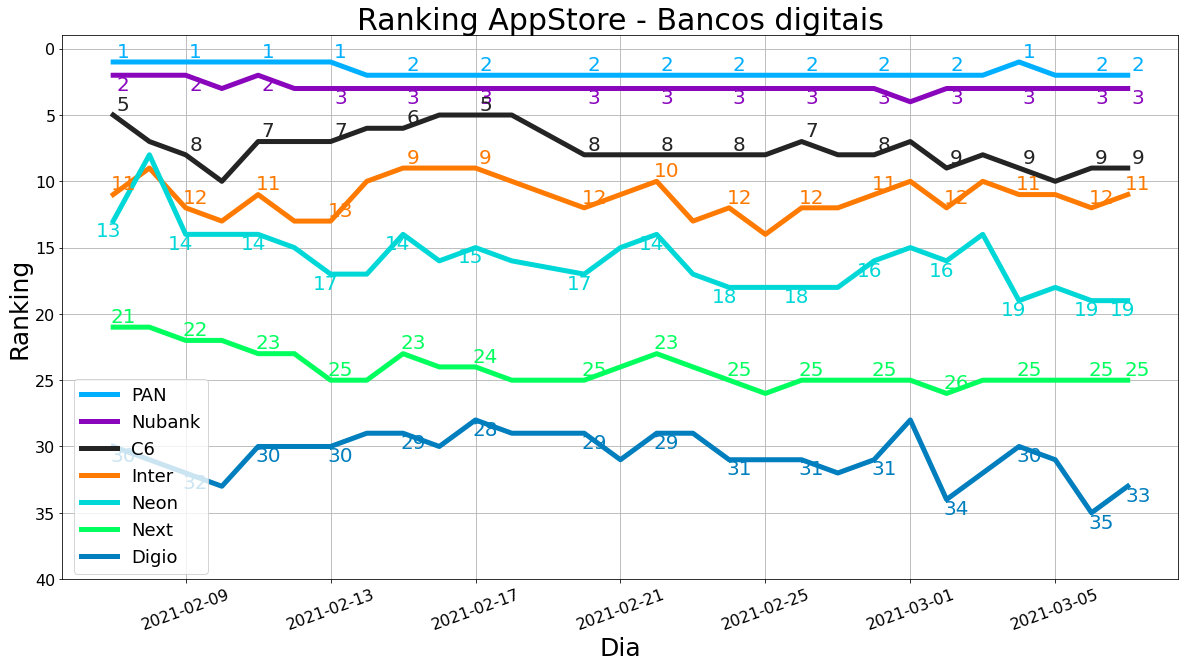

In [30]:
ultimos_30_dias = df_rank.iloc[-28:, :]

cores = {'Nubank': '#8A06BD',
         'Neon': '#00D8D8',
         'C6': '#242424',
         'Inter': '#FF7A01',
         'Digio': '#007ebd',
         'Next': '#01FF5E',
         'PAN': '#00AFFF'}

# Configurando as figura
plt.figure(figsize=(20, 10))

apps = ultimos_30_dias.iloc[:-1, 3:].mean().sort_values().index

# Iterando em cada app
for app in apps:
    
    # Inicializando um contador
    cont = 0
    
    # Plotando o gráfico para cada app
    plt.plot(ultimos_30_dias['Data'], ultimos_30_dias[app], color=cores[app], label=app, linewidth=5)
    
    # Iternando em cada par (data, ranking) para cada app
    for x,y in zip(ultimos_30_dias['Data'], ultimos_30_dias[f'{app}']):
        
        # Condição para mudar as posições das anotações do app da Nubank
        if app == 'Nubank':
            
            # Setando as posições das anotações do app da Nubank
            y_pos = -15
            x_pos = 10
        
        # Condição para mudar as posições das anotações do app da Neon
        elif app == 'Neon':
            
            # Setando as posições das anotações do app da Neon
            y_pos = -15
            x_pos = -5
        
        # Condição para mudar as posições das anotações do app da C6
        elif app == 'C6':
            
            # Setando as posições das anotações do app da C6
            y_pos = 5
            x_pos = 10
        
        # Condição para mudar as posições das anotações do app da Inter
        elif app == 'Inter':
            
            # Setando as posições das anotações do app da Inter
            y_pos = 5
            x_pos = 10

        # Condição para mudar as posições das anotações do app da Digio
        elif app == 'Digio':
            
            # Setando as posições das anotações do app da Digio
            y_pos = -15
            x_pos = 10

        # Condição para mudar as posições das anotações do app da Next
        elif app == 'Next':
            
            # Setando as posições das anotações do app da Next
            y_pos = 5
            x_pos = 10

        # Condição para mudar as posições das anotações do app da PAN
        elif app == 'PAN':
            
            # Setando as posições das anotações do app da PAN
            y_pos = 5
            x_pos = 10

        # Condição para mostrar não mostrar todas as anotações
        if cont % 2 == 0 or cont == ultimos_30_dias.shape[0] - 1:

            # label -> anotação que vai aparecer
            anotacao = f'{y}'
            
            # Plotando as anotações
            plt.annotate(anotacao, (x,y), # coordenada da anotação
                         textcoords="offset points", # como posicionar a anotação
                         xytext=(x_pos, y_pos), # distância da anotação para o seu respectivo ponto (x,y)
                         ha='center', # alinhamento horizontal da anotação. Pode ser 'left', 'right' ou 'center'
                         fontsize=20, # tamanho da fonte da anotação
                         color=cores[app]) # cor da anotação
        
        # Incrementanndo o contador
        cont += 1

limite = ultimos_30_dias.iloc[:, 3:].max().max() + 5

# Invertendo o eixo y
plt.ylim(limite, -1)

# Colocando grid
plt.grid(True)

# Definindo o título
plt.title('Ranking AppStore (Últimos 30 dias) - Bancos digitais', fontsize=30)

# Definindo a legenda
plt.legend(labels=apps, fontsize=18, loc=(0.01, 0.01))

# Definindo o label do eixo y
plt.ylabel('Ranking', fontsize=25)

# Definindo o label do eixo x
plt.xlabel('Dia', fontsize=25)

# Formatando os ticks
plt.xticks(fontsize=16, rotation=20)
plt.yticks(fontsize=16)

# Salvando a figura
# plt.savefig('images\\Ranking_AppStore-Bancos_digitais.png')

# Mostrando a figura
plt.show()